In [1]:

from pathlib import Path

import pandas as pd

from utils import plot_label_dist, set_seed

set_seed(42)

SRC_DATASET_ROOT = Path('./fn-content-dataset')
SRC_DATASET_NAME = 'action_labels.csv'

In [2]:
df = pd.read_csv(SRC_DATASET_ROOT / SRC_DATASET_NAME, index_col=0)
# count the number of labels per sample
_labels = df.drop(['file_name'], axis=1)
df['label_count'] = _labels.sum(axis=1)
_zero_labels_filter = df['label_count'] != 0
df = df[_zero_labels_filter]
df

,69,anal_fucking,ass_licking,ass_penetration,fingering,grabbing_ass,grabbing_boobs,grabbing_hair/head,handjob,kissing,...,pussy_rubbing,vaginal_fucking,vaginal_penetration,vibrating,wet_genitals,blowjob,cum,pussy_licking,file_name,label_count
1,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,1,0,0,1.jpg,3
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,2.jpg,1
3,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,3.jpg,3
4,0,0,0,0,0,0,0,1,1,0,...,1,0,0,0,1,1,0,0,4.jpg,5
5,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,5.jpg,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625137,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,625137.jpg,2
625138,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,625138.jpg,2
625139,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,625139.jpg,2
625140,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,625140.jpg,2


In [3]:
file_names = df[['file_name']]
label_df = df.drop(['label_count', 'file_name'], axis=1)
label_df.shape

(280592, 19)

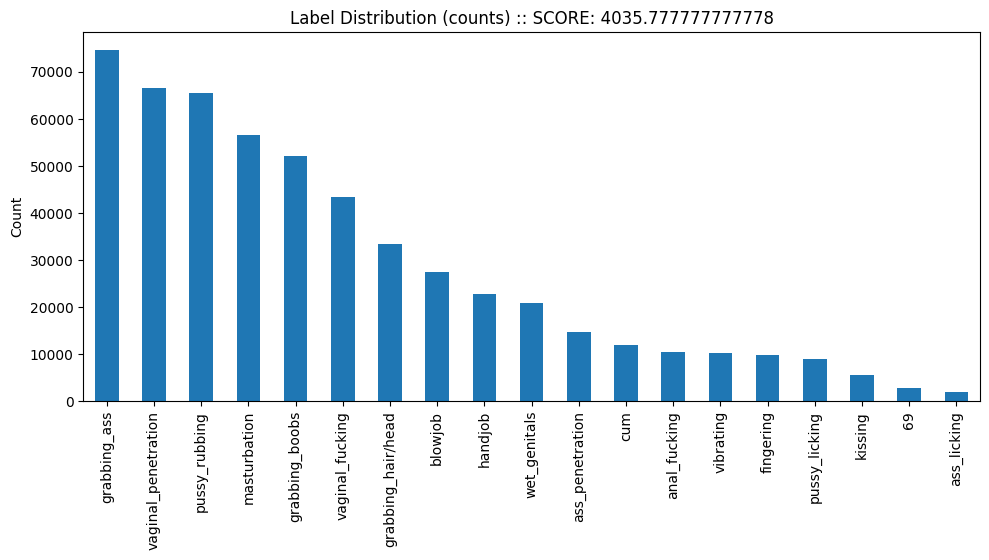

In [4]:
filtered_counts = plot_label_dist(label_df)

# Get only the labels below a certain threshold

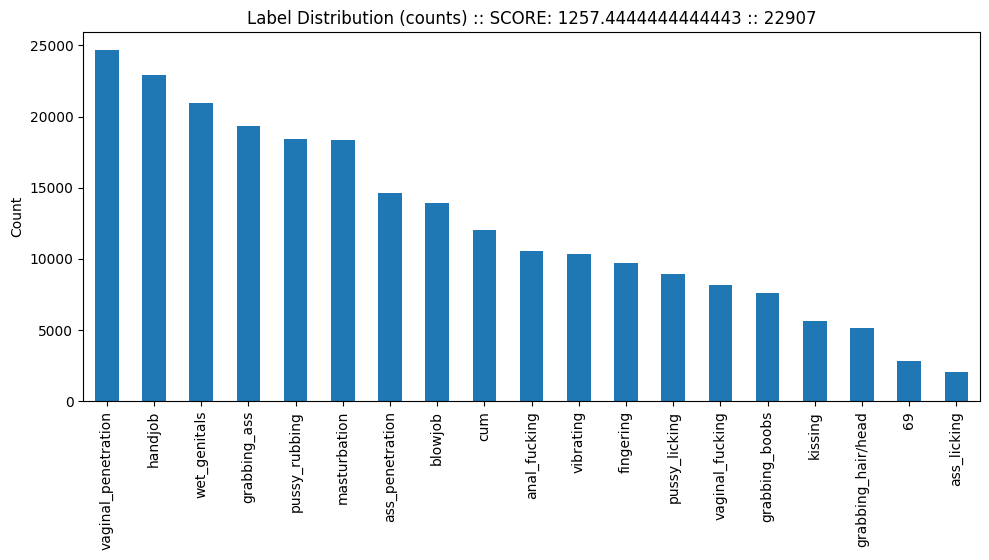

In [5]:


threshold = 22907

# for threshold in tqdm(filtered_counts.values):
sampled_labels = filtered_counts[filtered_counts <= threshold].index.tolist()

original_labels = label_df.columns.tolist()

sampled_df = label_df[sampled_labels].copy()
sampled_df['label_count'] = sampled_df.sum(axis=1)
_zero_labels_filter = sampled_df['label_count'] != 0
sampled_df = sampled_df[_zero_labels_filter]
sampled_df = sampled_df.drop(['label_count'], axis=1)

sampled_index = sampled_df.index.tolist()
_merge_filter = label_df.index.isin(sampled_index)
_merged_df = label_df.loc[_merge_filter]
_ = plot_label_dist(_merged_df, name=threshold)

In [6]:
file_names

,file_name
1,1.jpg
2,2.jpg
3,3.jpg
4,4.jpg
5,5.jpg
...,...
625137,625137.jpg
625138,625138.jpg
625139,625139.jpg
625140,625140.jpg


In [7]:
_merged_df.shape

(91862, 19)

In [8]:
merged_ = file_names.merge(_merged_df, left_index=True, right_index=True)
merged_.reset_index(inplace=True, drop=True)
merged_

,file_name,69,anal_fucking,ass_licking,ass_penetration,fingering,grabbing_ass,grabbing_boobs,grabbing_hair/head,handjob,kissing,masturbation,pussy_rubbing,vaginal_fucking,vaginal_penetration,vibrating,wet_genitals,blowjob,cum,pussy_licking
0,1.jpg,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0
1,3.jpg,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
2,4.jpg,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,0
3,10.jpg,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
4,16.jpg,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91857,625137.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
91858,625138.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
91859,625139.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
91860,625140.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0


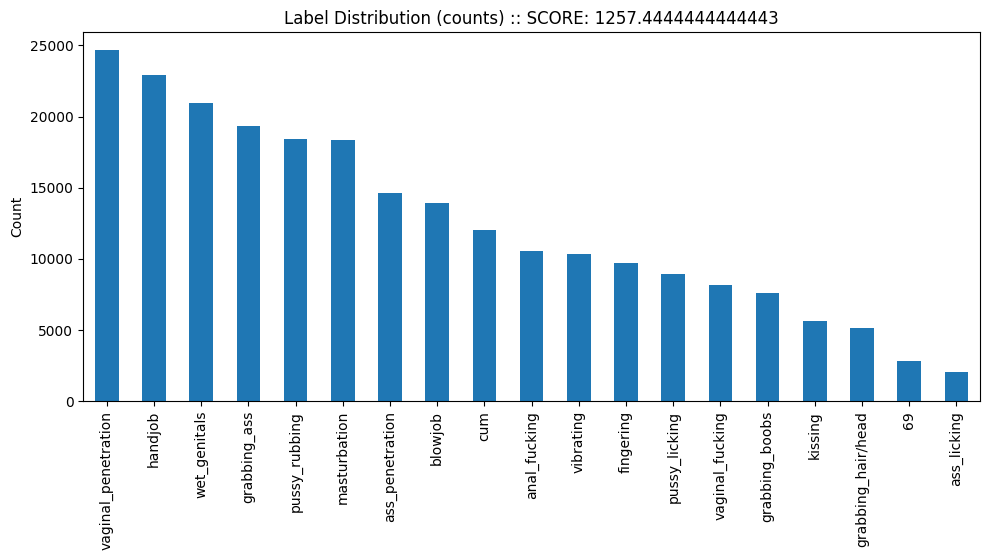

vaginal_penetration    24682
handjob                22907
wet_genitals           20975
grabbing_ass           19349
pussy_rubbing          18410
masturbation           18371
ass_penetration        14655
blowjob                13936
cum                    12027
anal_fucking           10577
vibrating              10348
fingering               9734
pussy_licking           8919
vaginal_fucking         8198
grabbing_boobs          7584
kissing                 5638
grabbing_hair/head      5154
69                      2828
ass_licking             2048
dtype: int64

In [9]:
plot_label_dist(merged_.drop(['file_name'], axis=1))

In [10]:
merged_.to_csv(SRC_DATASET_ROOT / 'balanced_action_labels.csv')

In [15]:
from tqdm import tqdm
import shutil
from concurrent.futures import ThreadPoolExecutor

COMPILED_DATASET = SRC_DATASET_ROOT / 'compiled'
COMPILED_DATASET.mkdir(exist_ok=True)

def copy_the_image(image_path: str):
    src = SRC_DATASET_ROOT / 'images' / image_path
    dst = COMPILED_DATASET / image_path
    if dst.exists():
        return

    shutil.copy(
        src,
        dst
    )


with ThreadPoolExecutor(max_workers=16) as executor:
    futures = [
        executor.submit(copy_the_image, fp) for fp in merged_['file_name'].tolist()
    ]

    for future in tqdm(futures, total=len(futures)):
        _ = future.result()


100%|██████████| 91862/91862 [00:19<00:00, 4753.20it/s]
